In [1]:
import numpy as np
import pylab as plt

from pycbc.detector import add_detector_on_earth
from pycbc import psd
from pycbc.cosmology import redshift
from simple_pe.localization import Event
from simple_pe.detectors import Network

In [101]:
# Set up CE detector locations
lon = -125 / 180.0 * np.pi
lat = 46 / 180.0 * np.pi
yangle = 100.0 / 180.0 * np.pi
add_detector_on_earth("C1", lon, lat, yangle=yangle)

lon = -94 / 180.0 * np.pi
lat = 29 / 180.0 * np.pi
yangle = 160.0 / 180.0 * np.pi
add_detector_on_earth("C2", lon, lat, yangle=yangle)

Network details

In [102]:
df = 1./8
f_high = 4096
flen = int(f_high/df) + 1

In [103]:
flow = {'ET': 3,
        'CE': 5.2,
        'A+': 10,
        'A#': 10
        }

In [104]:
asharp = psd.from_txt('../ligo_strain/Asharp_strain.txt',
                            flen, df, flow['A#'])
ce40 = psd.from_txt('../ce_strain/cosmic_explorer_strain.txt',
                         flen, df, flow['CE'])
ce20 = psd.from_txt('../ce_strain/cosmic_explorer_20km_strain.txt',
                         flen, df, flow['CE'])
et = psd.analytical.EinsteinTelescopeP1600143(flen, df, flow['ET'])

In [105]:
psds = {
    'H1':asharp,
    'L1':asharp,
    'I1':asharp,
    'C1':ce40,
    'C2':ce20,
    'E1':et,
    'E2':et,
    'E3':et,
}

fmins = {'H1':flow['A#'],
    'L1':flow['A#'],
    'I1':flow['A#'],
    'C1':flow['CE'],
    'C2':flow['CE'],
    'E1':flow['ET'],
    'E2':flow['ET'],
    'E3':flow['ET'],
    
}

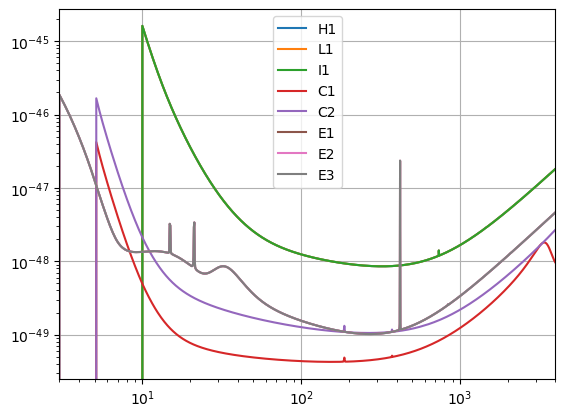

In [106]:
for i, p in psds.items():
    plt.loglog(p.sample_frequencies, p, label=i)
plt.grid()
plt.xlim(3, 4000)
plt.legend()

In [88]:
configurations = {}

In [89]:
configurations['HLA'] = ['H1', 'L1', 'I1']
configurations['40LA'] = ['C1', 'L1', 'I1']
configurations['40LET'] =  ['C1', 'L1', 'E1', 'E2', 'E3']
configurations['2040A'] =  ['C1', 'C2', 'I1']
configurations['2040ET'] =  ['C1', 'C2', 'E1', 'E2', 'E3']

In [90]:
method = "coh"

In [91]:
found_thresh = 3.0
net_thresh = 8.0
loc_thresh = 3.0
duty_cycle = 1.0

BNS_min_chirp_mass = 1.4 * 2 ** (-1. / 5)

In [92]:
networks = {}
for key,ifos in configurations.items():
    networks[key] = Network(net_thresh)
    networks[key].generate_network_from_psds(ifos, psds, fmins, found_thresh=found_thresh, loc_thresh=loc_thresh)

2023-05-22  15:44:37 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-05-22  15:44:37 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-05-22  15:44:37 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-05-22  15:44:38 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-05-22  15:44:38 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-05-22  15:44:38 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-05-22  15:44:38 PESummary WARNING : Could not find f_final in input file and one was not passed

In [93]:
savefig = True

In [94]:
psi = 0.
cosi = 1.
gps = float(999995380)
mass = 1.4

In [95]:
dl = 2900.
z = redshift(dl)
m1 = m2 = mass * (1 + z)

In [96]:
print(z)

0.49737298454282014


In [97]:
params = {}
params['distance'] = dl
params['gps'] = gps
params['coa-phase'] = 0.
params['polarization'] = psi
params['inclination'] = np.arccos(cosi)
params['mass1'] = m1
params['mass2'] = m2
params['RAdeg'] = -90
params['DEdeg'] = 30

In [98]:
ra_min = 266
ra_max = 274
dec_min = 26.5
dec_max = 35
step = 1

In [99]:
bns_event = {}
for name, net in networks.items():
    
    bns_event[name] = Event.from_params(params=params)
    bns_event[name].add_network(net)
    if bns_event[name].detected:
        if bns_event[name].localized >= 3:
            bns_event[name].localize_all() 

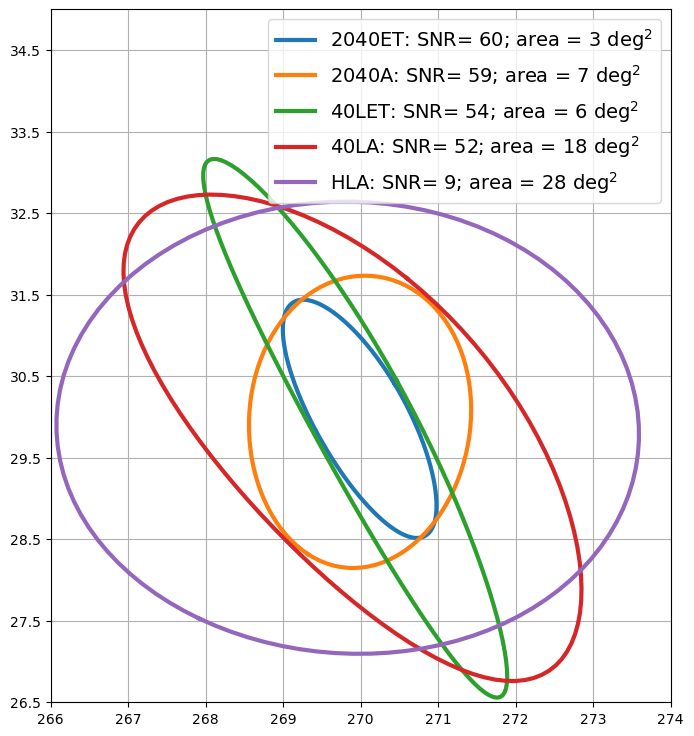

In [100]:
plt.figure(figsize=[8,9])
for name, net in reversed(networks.items()):

    ev = bns_event[name]

    phi, theta = ev.localization['coh'].make_ellipse()
    plt.plot(np.degrees((phi - np.pi) % (2 * np.pi) + np.pi), np.degrees(theta),
             label=(r'%s: SNR= %.0f; area = %.0f $\mathrm{deg}^2$' % (name, np.sqrt(ev.snrsq), ev.localization['coh'].area)),
             linewidth=3)
        
plt.legend(loc='upper right', fontsize=14)

ax = plt.gca()

plt.xticks(np.arange(ra_min, ra_max + step , step))
plt.yticks(np.arange(dec_min, dec_max + step, step))

plt.xlim(ra_min, ra_max)
plt.ylim(dec_min, dec_max)

plt.grid()
if savefig:
    plt.savefig('Localization_ellipse_z_05.png', transparent=True, bbox_inches='tight')

In [42]:
dl = 7000.
z = redshift(dl)
psi = 0.
cosi = 1.
gps = float(999995380)
mass = 1.4
m1 = m2 = mass * (1 + z)

In [43]:
z

1.0247914332892911

In [44]:
params = {}
params['distance'] = dl
params['gps'] = gps
params['coa-phase'] = 0.
params['polarization'] = psi
params['inclination'] = np.arccos(cosi)
params['mass1'] = m1
params['mass2'] = m2
params['RAdeg'] = -90
params['DEdeg'] = 30

In [45]:
dec_min = 23
dec_max = 36

In [46]:
bns_event = {}
for name, net in networks.items():
    bns_event[name] = Event.from_params(params=params)
    bns_event[name].add_network(net)
    if bns_event[name].detected:
        if bns_event[name].localized >= 3:
            bns_event[name].localize_all() 

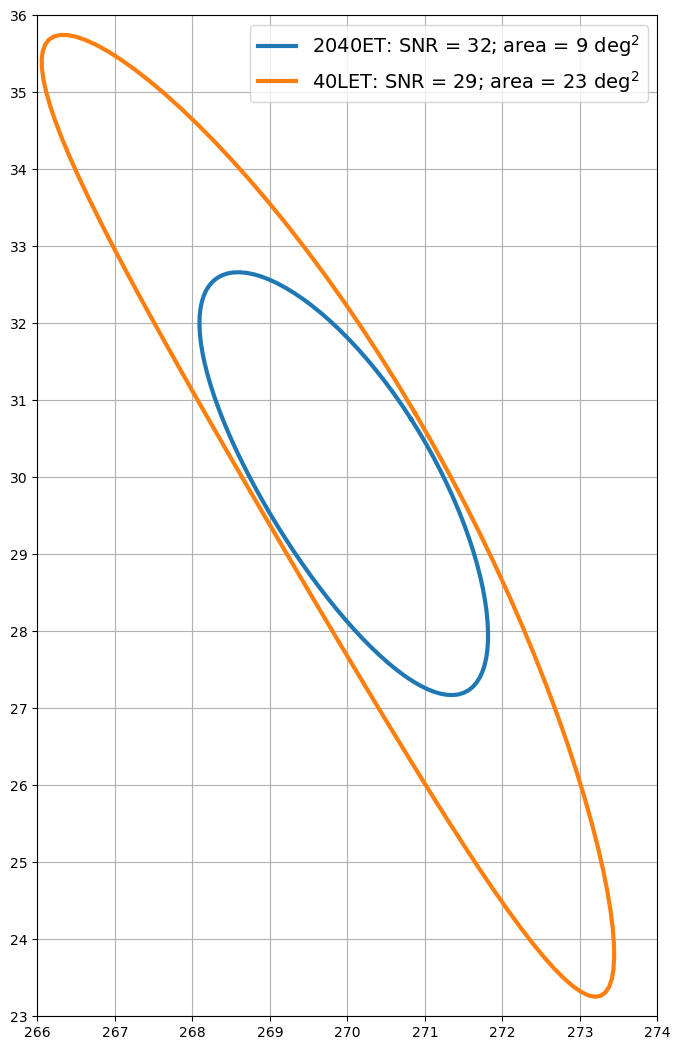

In [47]:
plt.figure(figsize=[8,13])
for name, net in reversed(networks.items()):

    ev = bns_event[name]

    if ev.localized >= 3:
        phi, theta = ev.localization['coh'].make_ellipse()
        plt.plot(np.degrees((phi - np.pi) % (2 * np.pi) + np.pi), np.degrees(theta),
             label=(r'%s: SNR = %.0f; area = %.0f $\mathrm{deg}^2$' % (name, np.sqrt(ev.snrsq), ev.area['coh'])),
             linewidth=3)
        
plt.legend(loc='upper right', fontsize=14)

ax = plt.gca()

plt.xticks(np.arange(ra_min, ra_max + step , step))
plt.yticks(np.arange(dec_min, dec_max + step, step))


plt.xlim(ra_min, ra_max)
plt.ylim(dec_min, dec_max)

plt.grid()
if savefig:
    plt.savefig('Localization_ellipse_all.png', transparent=True, bbox_inches='tight')